# Dev notebook

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import utils

### input parameter

In [2]:
urls = [
    '?date=2024-06-06&station_id=0-20008-0-UGR-A', # strong dust event
    '?date=2024-09-30&station_id=0-20008-0-UGR-A', # aloft dust layer
    '?date=2024-09-28&station_id=0-250-1001-07151-B', # low and high clouds
    '?date=2024-09-28&dev&lr=IFS&station_id=0-620-3704-5480-B', # high clouds
    '?date=2024-09-28&dev&lr=IFS&station_id=0-20000-0-01492-A', # low clouds
    '?date=2024-09-28&dev&lr=IFS&station_id=0-20000-0-01311-A', # clouds and precipitations
    '?date=2024-09-30&dev&lr=IFS&station_id=0-20000-0-01311-A', # low and mid clouds
    '?date=2024-09-30&dev&lr=IFS&station_id=0-20000-0-01001-A', #thin low clouds
]

In [4]:
yyyy, mm, dd, station_id = utils.get_parameters_from_url(urls[0])
path = f'../data/{yyyy}/{mm}/{dd}/AP_{station_id}-{yyyy}-{mm}-{dd}.nc'

### read file

In [5]:
vars = ['attenuated_backscatter_0']
ds = xr.open_dataset(path)[vars].load()

### SNR

/home/augustinm/work/v-profiles/ai-profiles/utils.py:29: RuntimeWarning: invalid value encountered in log10
  array = np.log10(ds[variable].data[t, :])
/home/augustinm/work/v-profiles/ai-profiles/utils.py:37: RuntimeWarning: Mean of empty slice
  means = np.nanmean(sliding_windows, axis=1)
/home/augustinm/.cache/pypoetry/virtualenvs/ai-profiles-fyAD6Fhh-py3.10/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


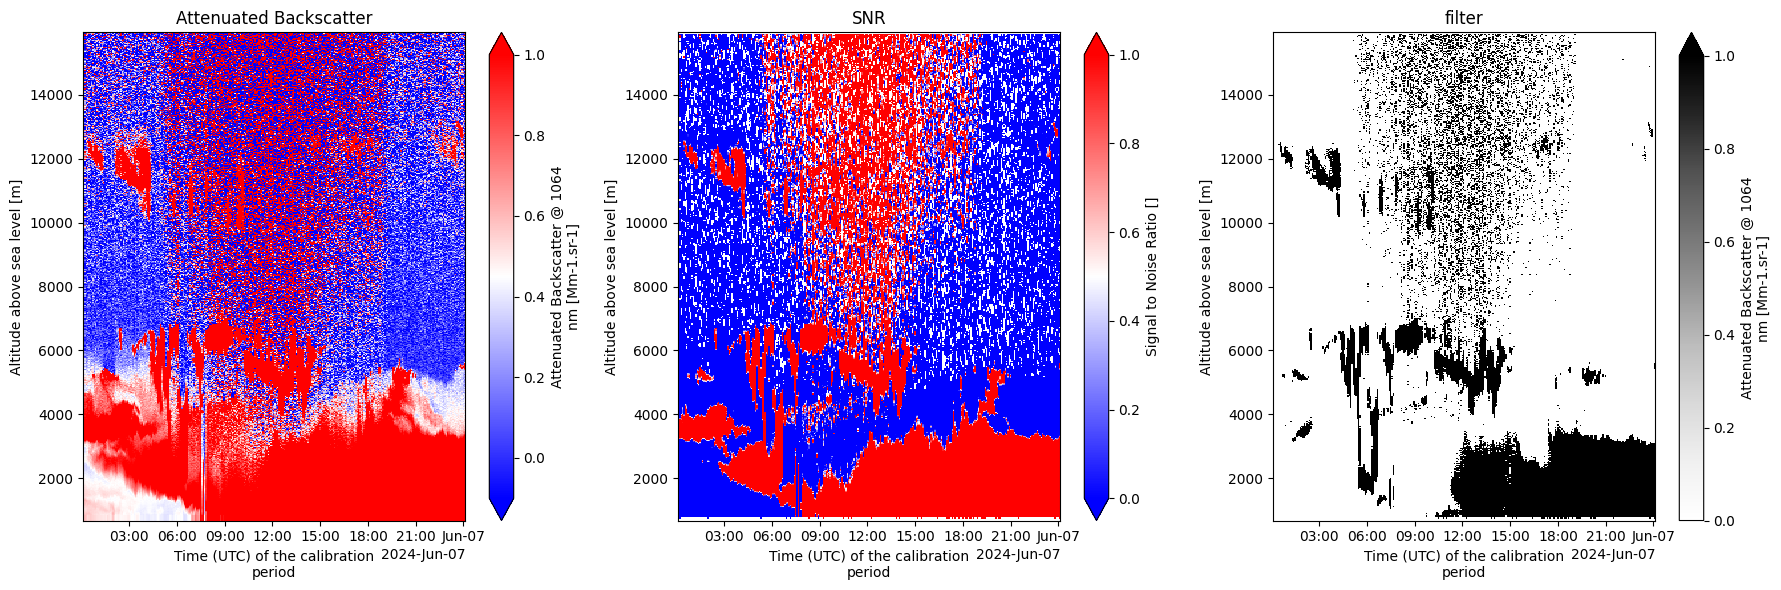

In [6]:
ds = utils.snr(ds, 'attenuated_backscatter_0', step=2, log=True)

thr_cloud = 1.5; thr_snr = 0.5
ds['filter'] = ds.where(ds.attenuated_backscatter_0>=thr_cloud).where(ds.snr>=thr_snr)['attenuated_backscatter_0']

left = {'variable': 'attenuated_backscatter_0', 'title': 'Attenuated Backscatter', 'vmin': -0.1, 'vmax': 1, 'cmap': 'bwr'}
middle = {'variable': 'snr','title': 'SNR','vmin': 0,'vmax': 1,'cmap': 'bwr'}
right = {'variable': 'filter','title': 'filter','vmin': 0,'vmax': 1,'cmap': 'Grays'}
utils.plot_pannel(ds, left, middle, right)

### gaussian filter + SNR

/home/augustinm/work/v-profiles/ai-profiles/utils.py:29: RuntimeWarning: invalid value encountered in log10
  array = np.log10(ds[variable].data[t, :])
/home/augustinm/work/v-profiles/ai-profiles/utils.py:37: RuntimeWarning: Mean of empty slice
  means = np.nanmean(sliding_windows, axis=1)
/home/augustinm/.cache/pypoetry/virtualenvs/ai-profiles-fyAD6Fhh-py3.10/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


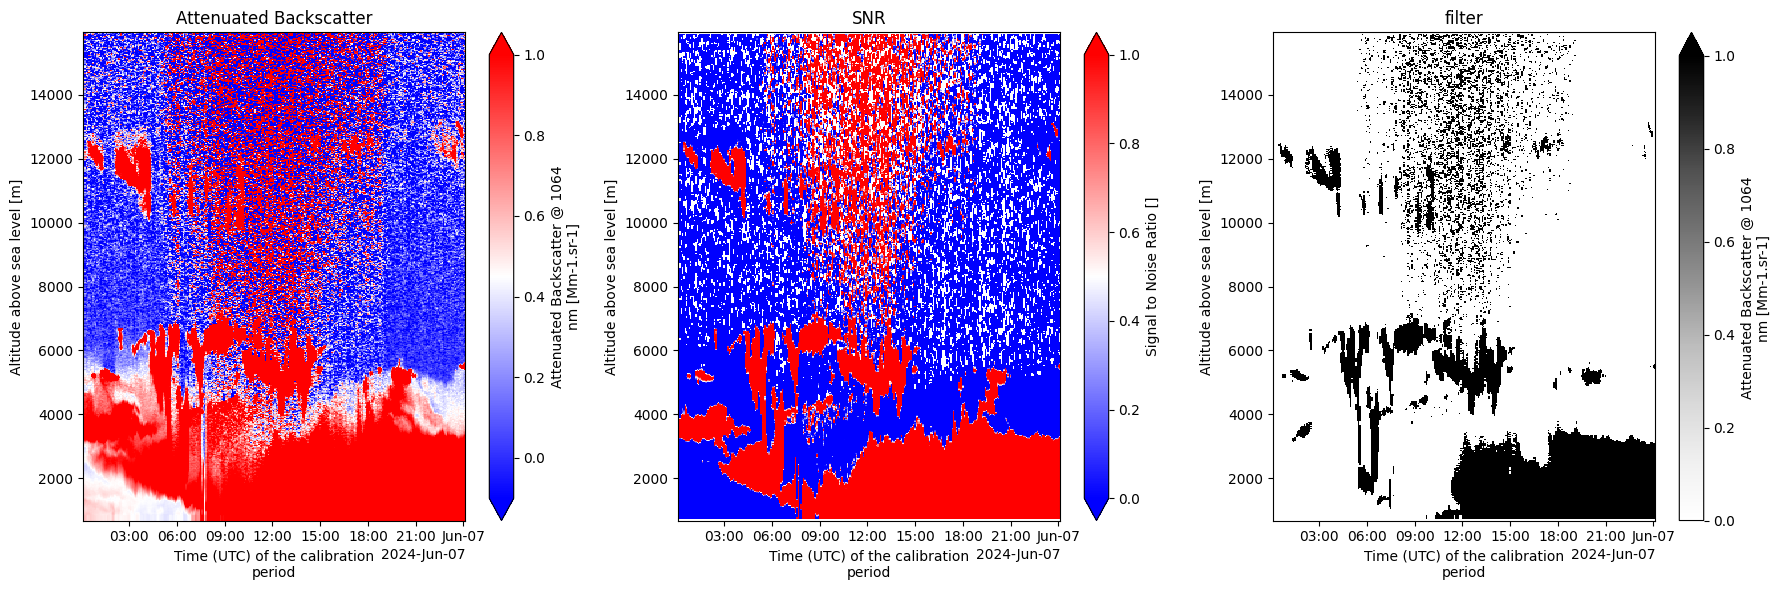

In [7]:
ds2 = ds
ds2 = utils.gaussian_filter(ds, sigma=0.5)
ds2 = utils.snr(ds2, 'attenuated_backscatter_0', step=2, log=True)

thr_cloud = 1.5; thr_snr = 0.5
ds2['filter'] = ds2['attenuated_backscatter_0'].where(ds2.attenuated_backscatter_0>=thr_cloud).where(ds2.snr>=thr_snr)

left = {'variable': 'attenuated_backscatter_0', 'title': 'Attenuated Backscatter', 'vmin': -0.1, 'vmax': 1, 'cmap': 'bwr'}
middle = {'variable': 'snr','title': 'SNR','vmin': 0,'vmax': 1,'cmap': 'bwr'}
right = {'variable': 'filter','title': 'filter','vmin': 0,'vmax': 1,'cmap': 'Grays'}
utils.plot_pannel(ds2, left, middle, right)

### TODO

threshold function that increases with altitude to remove high altitude noise